In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

(1) Read the file and setup the date.

In [56]:
df = pd.read_csv('coronavirus_data.csv', parse_dates=['Date\n\n\n\n\n'])
df.head()

/tmp/ipykernel_14738/1584890182.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('coronavirus_data.csv', parse_dates=['Date\n\n\n\n\n'])


,Index,Province/State\n,Country/Region\n,Lat\n,Long\n\n\n\n\n,Date\n\n\n\n\n,Confirmed\n,Deaths\n\n,Recovered\n\n\n\n\n
0,1,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,2020-01-22,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0,0,0


(2) Fix the column titles.

In [57]:
df.columns = df.columns.str.replace(r'\n', '', regex=True)
df.rename(columns={
    'Province/State':'Province_State',
    'Country/Region':'Country_Region',
}, inplace=True)
df.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,2020-01-22,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0,0,0


(3) Display information about the dataset.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           3885 non-null   int64         
 1   Province_State  2220 non-null   object        
 2   Country_Region  3885 non-null   object        
 3   Lat             3885 non-null   float64       
 4   Long            3885 non-null   float64       
 5   Date            3885 non-null   datetime64[ns]
 6   Confirmed       3885 non-null   int64         
 7   Deaths          3885 non-null   int64         
 8   Recovered       3885 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 273.3+ KB


(4) Display descriptive statistics.

In [59]:
df.describe()

,Index,Lat,Long,Date,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885,3885.000000,3885.000000,3885.000000
mean,1943.000000,32.252000,45.775760,2020-02-09 00:00:00.000000256,396.487773,10.804118,78.544402
min,1.000000,-37.813600,-123.869500,2020-01-22 00:00:00,0.000000,0.000000,0.000000
25%,972.000000,27.610400,8.227500,2020-01-31 00:00:00,0.000000,0.000000,0.000000
50%,1943.000000,35.191700,78.000000,2020-02-09 00:00:00,2.000000,0.000000,0.000000
75%,2914.000000,42.315400,113.614000,2020-02-18 00:00:00,40.000000,0.000000,4.000000
max,3885.000000,64.000000,153.400000,2020-02-27 00:00:00,65596.000000,2641.000000,23383.000000
std,1121.647226,18.256877,84.338854,NaN,4017.397180,137.191519,846.918788


(5) Search and replace the empty entries.

In [60]:
df.isnull().sum()

Index                0
Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [61]:
df['Province_State'].fillna('unknown', inplace=True)
df.isnull().sum()

Index             0
Province_State    0
Country_Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

(6) Number of cases per date (first 10 days).

In [62]:
cases_by_day = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
cases_by_day.head(10)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
2020-01-27,2927,82,61
2020-01-28,5578,131,107
2020-01-29,6166,133,126
2020-01-30,8234,171,143


(7) Date with max/min number cases.

In [63]:
date_max_cases = cases_by_day['Confirmed'].idxmax()
print(f'The date with more number Covid cases was {str(date_max_cases).split(" ")[0]}')


The date with more number Covid cases was 2020-02-27


In [64]:
date_min_cases = cases_by_day['Confirmed'].idxmin()
print(f'The date with less number Covid cases was {str(date_min_cases).split(" ")[0]}')

The date with less number Covid cases was 2020-01-22


(8) Top 10 Covid cases per country.

In [66]:
top_10_country_cases = df['Country_Region'].value_counts().head(10)
top_10_country_cases

Country_Region
Mainland China    1147
US                 629
Australia          185
Canada             111
Estonia             37
Austria             37
Iran                37
Lebanon             37
Iraq                37
Oman                37
Name: count, dtype: int64

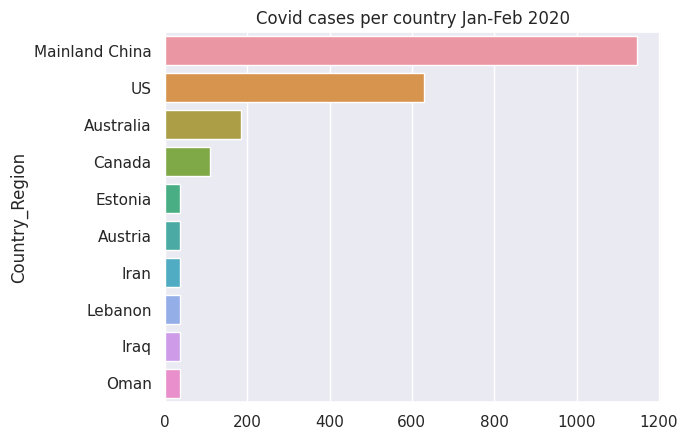

In [67]:
sns.set_theme(palette='viridis')
sns.barplot(x=top_10_country_cases.values, y=top_10_country_cases.index)
plt.title('Covid cases per country Jan-Feb 2020')
plt.show()

(9) How many countries were affected.

In [68]:
countries_affected = len(df['Country_Region'].unique())
print(f'By the first two months of 2020, there were {countries_affected} affected by Covid')

By the first two months of 2020, there were 53 affected by Covid


(10) Convert DataFrame into a GeoDataFrame.

In [69]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))
gdf.crs = {'init': 'epsg:4326'}
gdf.head(5)

/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,2020-01-22,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0,0,0,POINT (103.83430 36.06110)


In [70]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

(11) Mapplots about Covid.

(11.1) All world.

/tmp/ipykernel_14738/1629038337.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

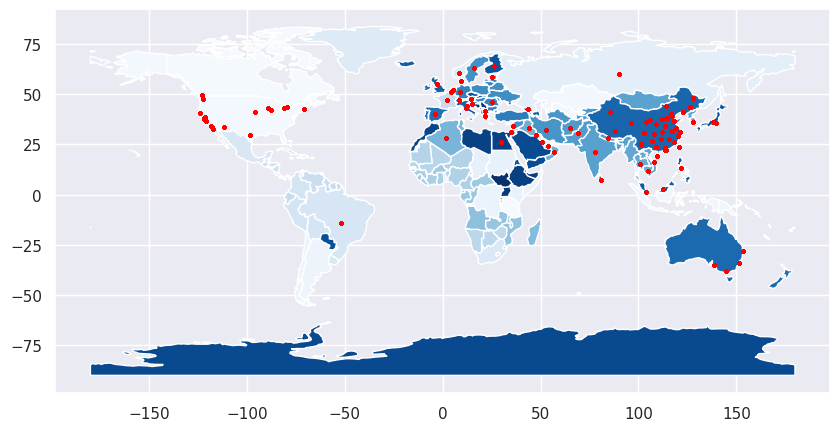

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(cmap='Blues', figsize=(10,10))
gdf.plot(ax=ax, color='red', markersize=3)

(11.2) China.

<Axes: >

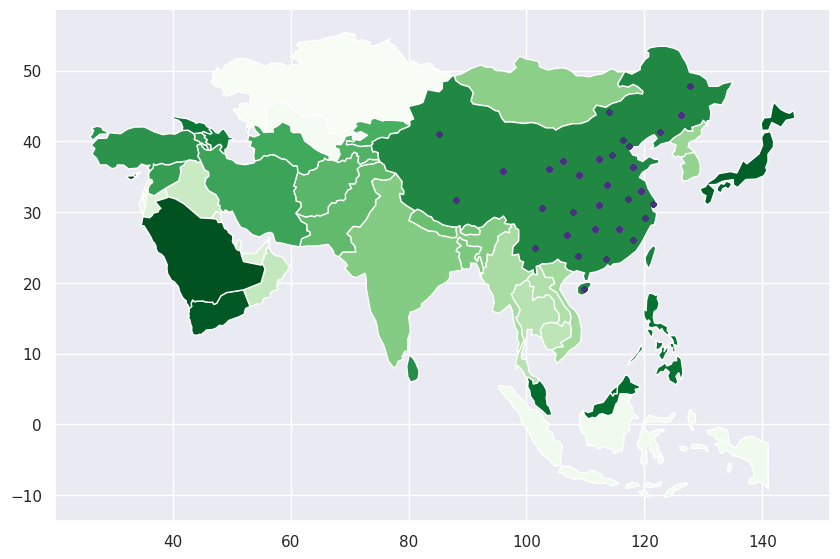

In [72]:
asia = world.loc[world['continent'] == 'Asia']
ax_1 = asia.plot(cmap='Greens', figsize=(10,10))
china = gdf[gdf['Country_Region'] == 'Mainland China']
china.plot(ax=ax_1, markersize=10)


(11.3) Canada

<Axes: >

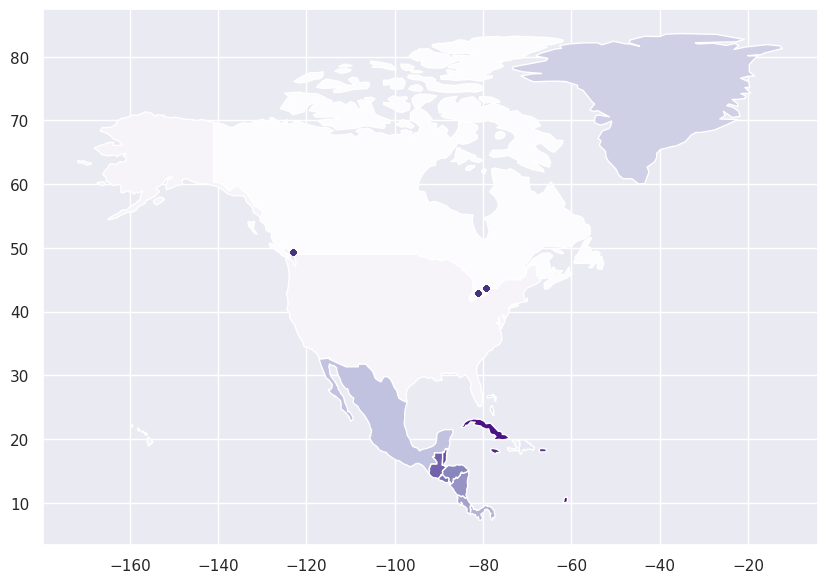

In [73]:
north_america = world.loc[world['continent'] == 'North America']
ax_1 = north_america.plot(cmap='Purples', figsize=(10,10))
canada = gdf[gdf['Country_Region'] == 'Canada']
canada.plot(ax=ax_1, markersize=10)


(12) Continent's areas.

In [74]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

(12.1) Asia's area.

In [75]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [76]:
asia.crs = {'init':'epsg:4326'}
asia_area = round(sum(asia['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total Asia's area is {} square km".format(asia_area))

The total Asia's area is 31248526 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(12.2) America's area.

In [77]:
america = world.loc[(world['continent'] == 'North America') | (world['continent'] == 'South America')]
america.crs = {'init':'epsg:4326'}
america_area = round(sum(america['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total America's area is {} square km".format(america_area))

The total America's area is 42242069 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(12.3) Europe's area.

In [78]:
europe = world.loc[world['continent'] == 'Europe']
europe.crs = {'init':'epsg:4326'}
europe_area = round(sum(europe['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total Europe's area is {} square km".format(europe_area))

The total Europe's area is 23063297 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(12.4) Africa's area.

In [79]:
africa = world.loc[world['continent'] == 'Africa']
africa.crs = {'init':'epsg:4326'}
africa_area = round(sum(africa['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total Africa's area is {} square km".format(africa_area))

The total Africa's area is 29944562 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(12.5) Oceania's area.

In [80]:
oceania = world.loc[world['continent'] == 'Oceania']
oceania.crs = {'init':'epsg:4326'}
oceania_area = round(sum(oceania['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total Oceania's area is {} square km".format(oceania_area))

The total Oceania's area is 8504115 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(12.6) Antarctica's area.

In [81]:
antarctica = world.loc[world['continent'] == 'Antarctica']
antarctica.crs = {'init':'epsg:4326'}
antarctica_area = round(sum(antarctica['geometry'].to_crs(epsg=3035).area)/10**6)
print("The total Antarctica's area is {} square km".format(antarctica_area))

The total Antarctica's area is 12334081 square km


/home/bruce/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
